# **1. Introduction**


# USDA National Nutrient Database Analysis

## Objective
This notebook provides an analysis of the USDA National Nutrient Database, focusing on dimensionality reduction using Principal Components Analysis (PCA) and classification of food groups. The aim is to gain insights into the nutritional composition of various food groups and identify unique or outlier food items.


# **2. Data Loading and Preprocessing**

Each record is for 100 grams.

The columns are mostly self-explanatory. The nutrient columns end with the units, so:

Nutrient_g is in grams
Nutrient_mg is in milligrams
Nutrient_mcg is in micrograms
Nutrient_USRDA is in percentage of US Recommended Daily Allows (e.g. 0.50 is 50%)


In [1]:
from google.colab import files
files.upload()

Saving nndb_flat.csv to nndb_flat.csv


{'nndb_flat.csv': b'ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA\n01001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",,,,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.0,0.02,2.0,0.0,24.0,1.0,0.09,0.76,0.0017647058823529412,0.07083333333333335,0.0,0.15466666666666665,0.0075,0.002625,0.026153846153846156,0.004166666666666667,0.02,0.0,0.004761904761904762,0.03428571428571429,0.01818181818181818,0.00818181818181818\n01002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, 

In [2]:
import pandas as pd
import seaborn as sns
# Load the dataset
file_path = 'nndb_flat.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

ID               FoodGroup              ShortDescrip  \
0  1001  Dairy and Egg Products          BUTTER,WITH SALT   
1  1002  Dairy and Egg Products  BUTTER,WHIPPED,WITH SALT   
2  1003  Dairy and Egg Products      BUTTER OIL,ANHYDROUS   
3  1004  Dairy and Egg Products               CHEESE,BLUE   
4  1005  Dairy and Egg Products              CHEESE,BRICK   

                      Descrip CommonName MfgName ScientificName  Energy_kcal  \
0              Butter, salted        NaN     NaN            NaN        717.0   
1  Butter, whipped, with salt        NaN     NaN            NaN        717.0   
2       Butter oil, anhydrous        NaN     NaN            NaN        876.0   
3                Cheese, blue        NaN     NaN            NaN        353.0   
4               Cheese, brick        NaN     NaN            NaN        371.0   

   Protein_g  Fat_g  ...  Folate_USRDA  Niacin_USRDA  Riboflavin_USRDA  \
0       0.85  81.11  ...        0.0075      0.002625          0.026154   
1       0.85  81.11  ...        0.0075      0.002625          0.026154   
2       0.28  99.48  ...        0.0000      0.000188          0.003846   
3      21.40  28.74  ...        0.0900      0.063500          0.293846   
4      23.24  29.68  ...        0.0500      0.007375          0.270000   

   Thiamin_USRDA  Calcium_USRDA  Copper_USRDA  Magnesium_USRDA  \
0       0.004167       0.020000      0.000000         0.004762   
1       0.004167       0.020000      0.000018         0.004762   
2       0.000833       0.003333      0.000001         0.000000   
3       0.024167       0.440000      0.000044         0.054762   
4       0.011667       0.561667      0.000027         0.057143   

   Phosphorus_USRDA  Selenium_USRDA  Zinc_USRDA  
0          0.034286        0.018182    0.008182  
1          0.032857        0.018182    0.004545  
2          0.004286        0.000000    0.000909  
3          0.552857        0.263636    0.241818  
4          0.644286        0.263636    0.236364  

[5 rows x 45 columns]

In [3]:
data.shape

(8618, 45)

In [4]:
data['FoodGroup'].unique()

array(['Dairy and Egg Products', 'Spices and Herbs', 'Baby Foods',
       'Fats and Oils', 'Poultry Products', 'Soups, Sauces, and Gravies',
       'Sausages and Luncheon Meats', 'Breakfast Cereals', 'Snacks',
       'Fruits and Fruit Juices', 'Pork Products',
       'Vegetables and Vegetable Products', 'Nut and Seed Products',
       'Beef Products', 'Beverages', 'Finfish and Shellfish Products',
       'Legumes and Legume Products', 'Lamb, Veal, and Game Products',
       'Baked Products', 'Sweets', 'Cereal Grains and Pasta',
       'Fast Foods', 'Meals, Entrees, and Side Dishes',
       'American Indian/Alaska Native Foods', 'Restaurant Foods'],
      dtype=object)

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


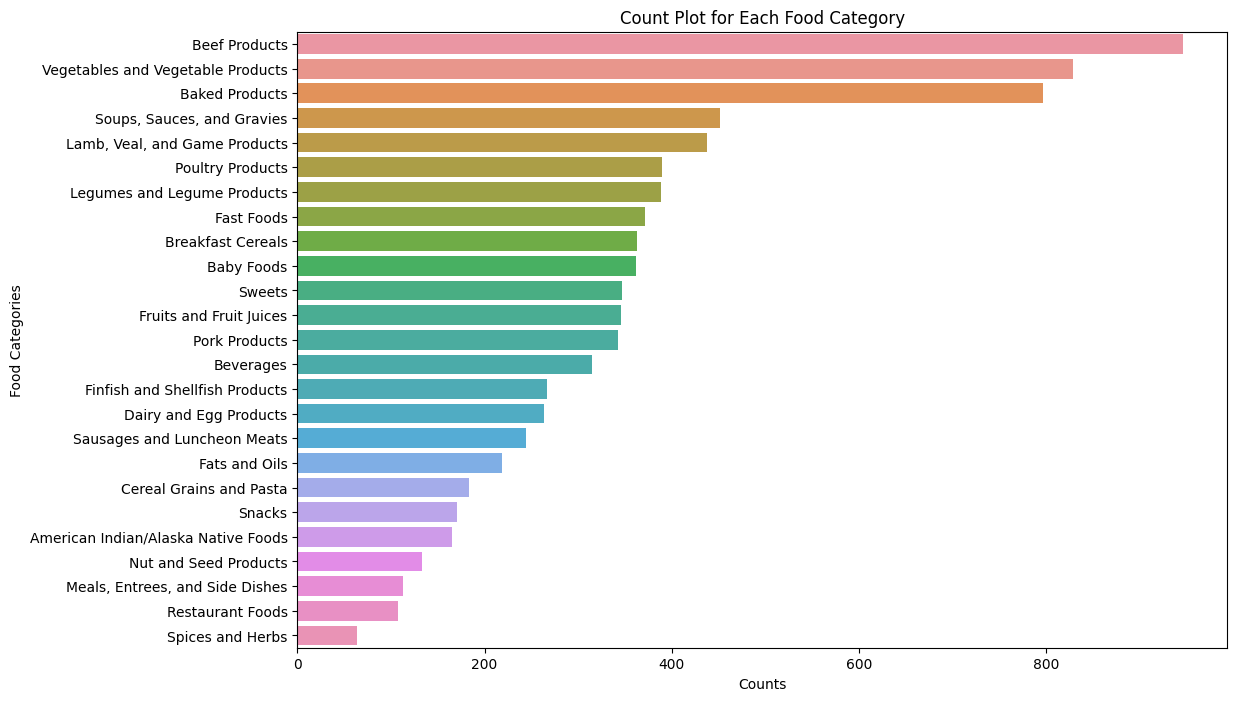

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a count plot
plt.figure(figsize=(12, 8))
sns.countplot(y='FoodGroup', data=data, order = data['FoodGroup'].value_counts().index)

# Set the title and labels
plt.title('Count Plot for Each Food Category')
plt.xlabel('Counts')
plt.ylabel('Food Categories')

# Show the plot
plt.show()

In [ ]:
data.columns

Index(['ID', 'FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName',
       'ScientificName', 'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g',
       'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg',
       'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg',
       'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg',
       'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg', 'VitA_USRDA', 'VitB6_USRDA',
       'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA',
       'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA',
       'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'],
      dtype='object')

In [ ]:
data.set_index('ID')

FoodGroup                ShortDescrip  \
ID                                                                  
1001           Dairy and Egg Products            BUTTER,WITH SALT   
1002           Dairy and Egg Products    BUTTER,WHIPPED,WITH SALT   
1003           Dairy and Egg Products        BUTTER OIL,ANHYDROUS   
1004           Dairy and Egg Products                 CHEESE,BLUE   
1005           Dairy and Egg Products                CHEESE,BRICK   
...                               ...                         ...   
83110  Finfish and Shellfish Products             MACKEREL,SALTED   
90240  Finfish and Shellfish Products  SCALLOP,(BAY&SEA),CKD,STMD   
90480                          Sweets                  SYRUP,CANE   
90560  Finfish and Shellfish Products                   SNAIL,RAW   
93600  Finfish and Shellfish Products            TURTLE,GREEN,RAW   

                                                 Descrip CommonName MfgName  \
ID                                                                            
1001                                      Butter, salted        NaN     NaN   
1002                          Butter, whipped, with salt        NaN     NaN   
1003                               Butter oil, anhydrous        NaN     NaN   
1004                                        Cheese, blue        NaN     NaN   
1005                                       Cheese, brick        NaN     NaN   
...                                                  ...        ...     ...   
83110                             Fish, mackerel, salted        NaN     NaN   
90240  Mollusks, scallop, (bay and sea), cooked, steamed        NaN     NaN   
90480                                        Syrup, Cane        NaN     NaN   
90560                               Mollusks, snail, raw        NaN     NaN   
93600                                 Turtle, green, raw        NaN     NaN   

      ScientificName  Energy_kcal  Protein_g  Fat_g  Carb_g  ...  \
ID                                                           ...   
1001             NaN        717.0       0.85  81.11    0.06  ...   
1002             NaN        717.0       0.85  81.11    0.06  ...   
1003             NaN        876.0       0.28  99.48    0.00  ...   
1004             NaN        353.0      21.40  28.74    2.34  ...   
1005             NaN        371.0      23.24  29.68    2.79  ...   
...              ...          ...        ...    ...     ...  ...   
83110            NaN        305.0      18.50  25.10    0.00  ...   
90240            NaN        111.0      20.54   0.84    5.41  ...   
90480            NaN        269.0       0.00   0.00   73.14  ...   
90560            NaN         90.0      16.10   1.40    2.00  ...   
93600            NaN         89.0      19.80   0.50    0.00  ...   

       Folate_USRDA  Niacin_USRDA  Riboflavin_USRDA  Thiamin_USRDA  \
ID                                                                   
1001         0.0075      0.002625          0.026154       0.004167   
1002         0.0075      0.002625          0.026154       0.004167   
1003         0.0000      0.000188          0.003846       0.000833   
1004         0.0900      0.063500          0.293846       0.024167   
1005         0.0500      0.007375          0.270000       0.011667   
...             ...           ...               ...            ...   
83110        0.0375      0.206250          0.146154       0.016667   
90240        0.0500      0.067250          0.018462       0.010000   
90480        0.0000      0.006250          0.046154       0.108333   
90560        0.0150      0.087500          0.092308       0.008333   
93600        0.0375      0.068750          0.115385       0.100000   

       Calcium_USRDA  Copper_USRDA  Magnesium_USRDA  Phosphorus_USRDA  \
ID                                                                      
1001        0.020000      0.000000         0.004762          0.034286   
1002        0.020000      0.000018         0.004762          0.032857   
1003        0.

From above we can see that dataset contains of 8618 rows and 45 columns.

In [9]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler


# Selecting numerical columns for PCA
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)


In [10]:
scaled_data.shape

(8618, 39)

# **3. Principal Components Analysis (PCA)**

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15)
scaled_data = StandardScaler().fit_transform(scaled_data)
pca_data = pca.fit_transform(scaled_data)


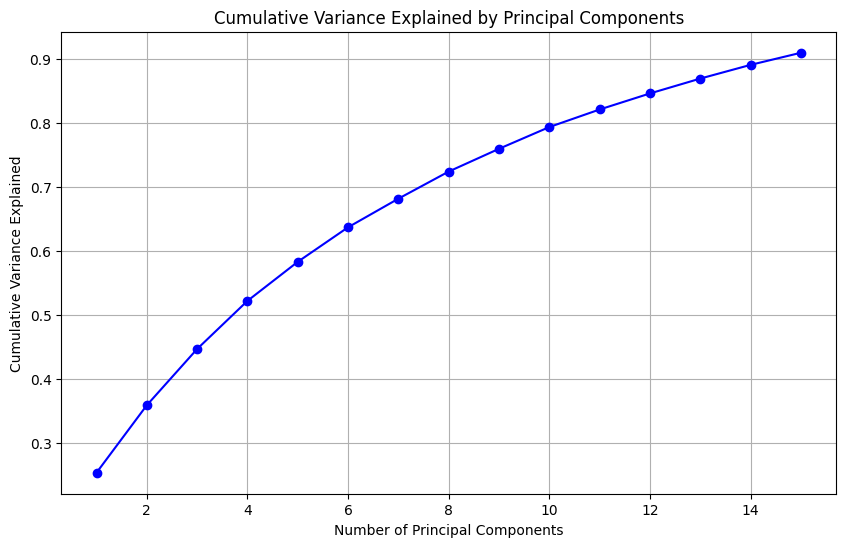

In [12]:
import matplotlib.pyplot as plt

# Assuming you've already performed PCA and have the explained variance ratios
explained_variance = pca.explained_variance_ratio_

# Calculating cumulative variance
cumulative_variance = explained_variance.cumsum()

# Creating a plot for the cumulative variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()



In [13]:
cumulative_variance

array([0.25304587, 0.35855329, 0.44647625, 0.52166631, 0.58273812,
       0.63671427, 0.6814334 , 0.72382049, 0.75940578, 0.79338308,
       0.82082983, 0.84590958, 0.86913785, 0.89057056, 0.90950067])

In [14]:
import plotly.graph_objects as go
import numpy as np

# Assuming pca_data and data['FoodGroup'] are already defined

# Create a Plotly figure
fig = go.Figure()

categories = np.unique(data['FoodGroup'])
colors = [
    "#FF0000",  # Red
    "#0000FF",  # Blue
    "#008000",  # Green
    "#FFFF00",  # Yellow
    "#FFA500",  # Orange
    "#800080",  # Purple
    "#00FFFF",  # Cyan
    "#FF00FF",  # Magenta
    "#00FF00",  # Lime
    "#FFC0CB",  # Pink
    "#008080",  # Teal
    "#E6E6FA",  # Lavender
    "#A52A2A",  # Brown
    "#F5F5DC",  # Beige
    "#98FF98",  # Mint
    "#808000",  # Olive
    "#FF7F50",  # Coral
    "#000080",  # Navy
    "#808080",  # Grey
    "#D2B48C",  # Tan
    "#A0522D",  # Sienna
    "#DAA520",  # Goldenrod
    "#DDA0DD",  # Thistle
    "#4B0082",  # Indigo
    "#00CED1"   # DarkTurquoise
]

# You can use this list directly in your Plotly plots



for i, category in enumerate(categories):
    idx = data['FoodGroup'] == category
    group_data = pca_data[idx]

    # Prepare hover text
    hover_text = [f'Index: {j}, x: {point[0]:.2f}, y: {point[1]:.2f}, z: {point[2]:.2f}' for j, point in zip(np.where(idx)[0], group_data)]

    # Add trace for each food group
    fig.add_trace(go.Scatter3d(
        x=group_data[:, 0],
        y=group_data[:, 1],
        z=group_data[:, 2],
        mode='markers',
        marker=dict(size=5, color=colors[i % len(colors)]),
        name=category,
        text=hover_text,
        hoverinfo='text'
    ))

# Update plot layout
fig.update_layout(
    title='3D Scatter Plot of PCA Data (Color Coded by Food Groups)',
    scene=dict(
        xaxis_title='Principal Component 1',
        yaxis_title='Principal Component 2',
        zaxis_title='Principal Component 3'
    ),
    legend_title='Food Groups'
)

# Show the plot
fig.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame

# Define numerical features and exclude 'id'
numerical_features = [col for col in data.select_dtypes(include=[np.number]).columns if col != 'ID']

# Scale the entire dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_features])

# Perform PCA
pca = PCA(n_components=15)
pca.fit(scaled_data)

# Extract the specific data point's index
index = 6827

# Ensure the index is within the range
if index < len(data):
    # Standardize the specific data point's features using the already fitted scaler
    scaled_datapoint = scaler.transform(data[numerical_features].iloc[[index]])

    # Project the specific data point into PCA space
    datapoint_pca = pca.transform(scaled_datapoint)

    # Calculate the contribution of each feature for the specific data point in the PCA space
    contributions = np.dot(datapoint_pca, pca.components_).flatten()

    # Create a Series for easier interpretation
    feature_contributions = pd.Series(contributions, index=numerical_features)

    # Sort features based on their total contributions
    sorted_contributions = feature_contributions.abs().sort_values(ascending=False)

    # Display the top contributing features
    print("Row at index", index, ":\n", data.iloc[index][:5])
    print("Top contributing features for datapoint at index", index, ":\n", sorted_contributions.index)
else:
    print("Index out of range.")


Row at index 6827 :
 ID                                          21337
FoodGroup                              Fast Foods
ShortDescrip       MCDONALD'S,PNUTS (FOR SUNDAES)
Descrip         McDONALD'S, Peanuts (for Sundaes)
CommonName                                    NaN
Name: 6827, dtype: object
Top contributing features for datapoint at index 6827 :
 Index(['Energy_kcal', 'Fat_g', 'Magnesium_USRDA', 'Magnesium_mg', 'Protein_g',
       'VitE_USRDA', 'VitE_mg', 'VitB6_mg', 'VitB6_USRDA', 'Phosphorus_mg',
       'Phosphorus_USRDA', 'Niacin_USRDA', 'Niacin_mg', 'Fiber_g', 'Sugar_g',
       'Calcium_USRDA', 'Calcium_mg', 'Folate_USRDA', 'Folate_mcg',
       'VitB12_mcg', 'VitB12_USRDA', 'Zinc_USRDA', 'Zinc_mg', 'Selenium_USRDA',
       'Selenium_mcg', 'Manganese_mg', 'Copper_mcg', 'Copper_USRDA',
       'Thiamin_mg', 'Thiamin_USRDA', 'Iron_mg', 'Riboflavin_USRDA',
       'Riboflavin_mg', 'VitA_mcg', 'VitA_USRDA', 'Carb_g', 'VitC_mg',
       'VitC_USRDA'],
      dtype='object')


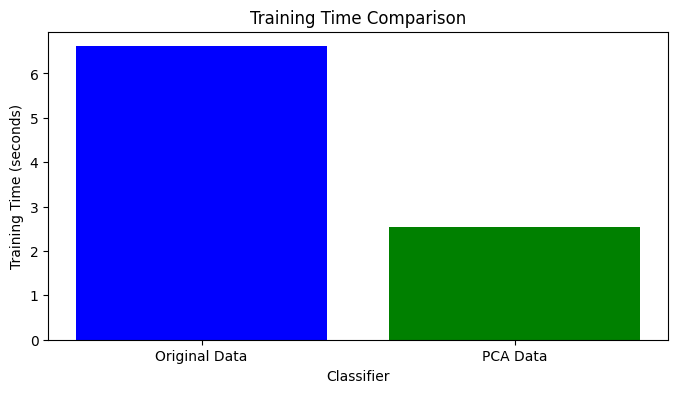

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import time
import sys
# Preparing the target variable (food group) and features
X_original = numerical_data  # Features from original data
y = data['FoodGroup']  # Target variable

# Splitting the original data into training and test sets
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X_original, y, test_size=0.3, random_state=42)

# Training a RandomForestClassifier on the original data
start_time = time.time()
rf_original = RandomForestClassifier(random_state=42)
rf_original.fit(X_train_orig, y_train)
elapsed_time_orig = time.time() - start_time

# Evaluating the model on the test set
y_pred_orig = rf_original.predict(X_test_orig)
report_orig = classification_report(y_test, y_pred_orig)

# Preparing PCA-reduced data
X_pca = pca_data  # Features from PCA data
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Training a RandomForestClassifier on the PCA-reduced data
start_time = time.time()
rf_pca = RandomForestClassifier(random_state=42)
rf_pca.fit(X_train_pca, y_train)
elapsed_time_pca = time.time() - start_time

# Evaluating the PCA model on the test set
y_pred_pca = rf_pca.predict(X_test_pca)
report_pca = classification_report(y_test, y_pred_pca)

training_times = [elapsed_time_orig, elapsed_time_pca]
labels = ['Original Data', 'PCA Data']

plt.figure(figsize=(8, 4))
plt.bar(labels, training_times, color=['blue', 'green'])
plt.xlabel('Classifier')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time Comparison')
plt.show()



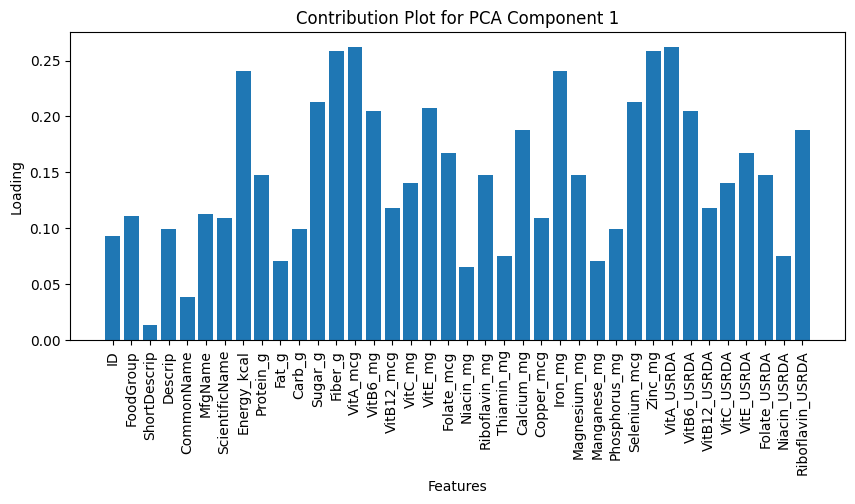

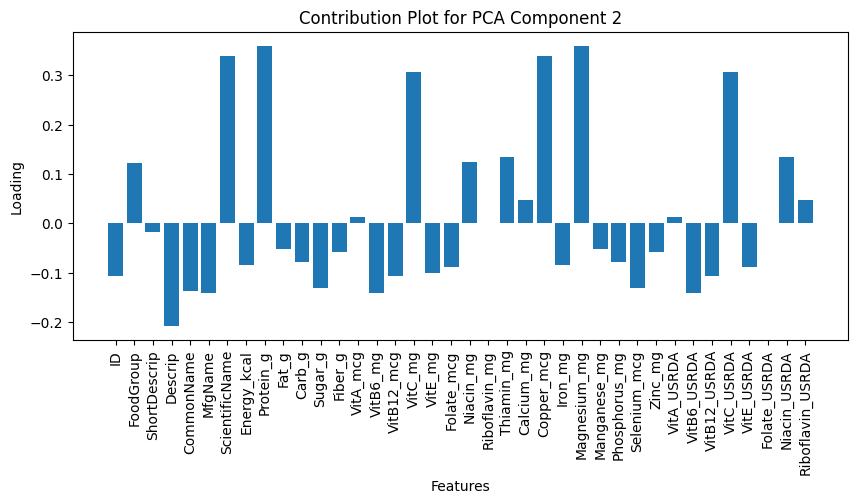

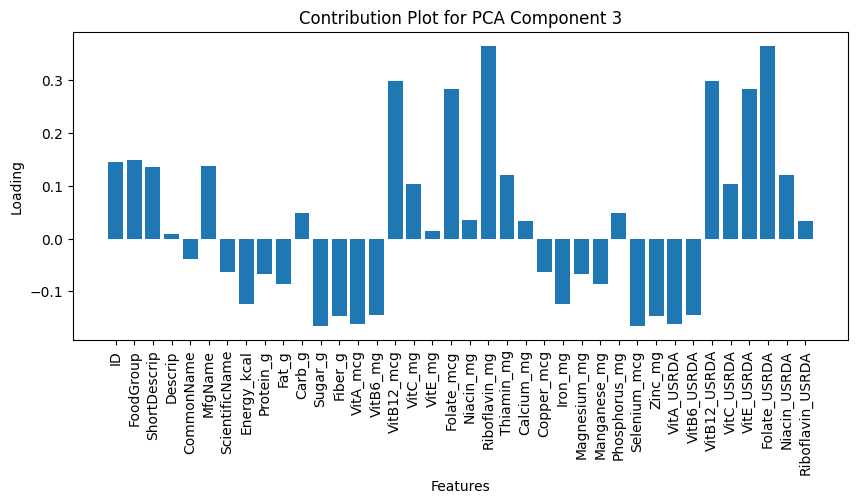

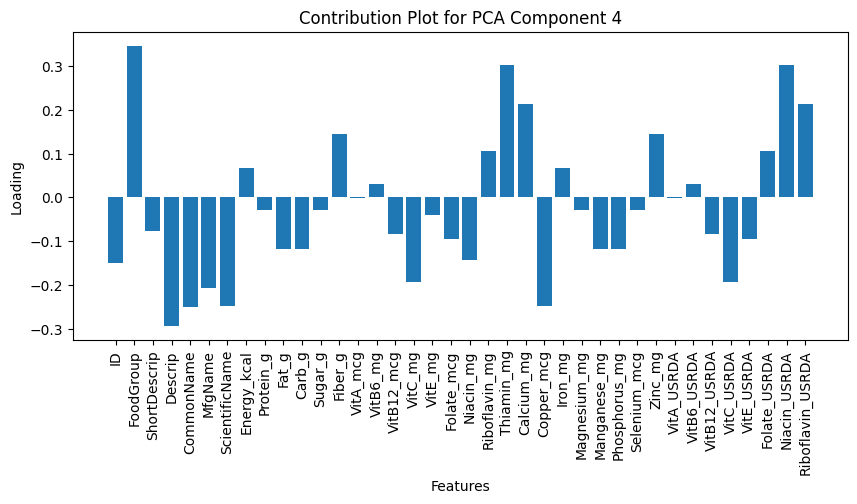

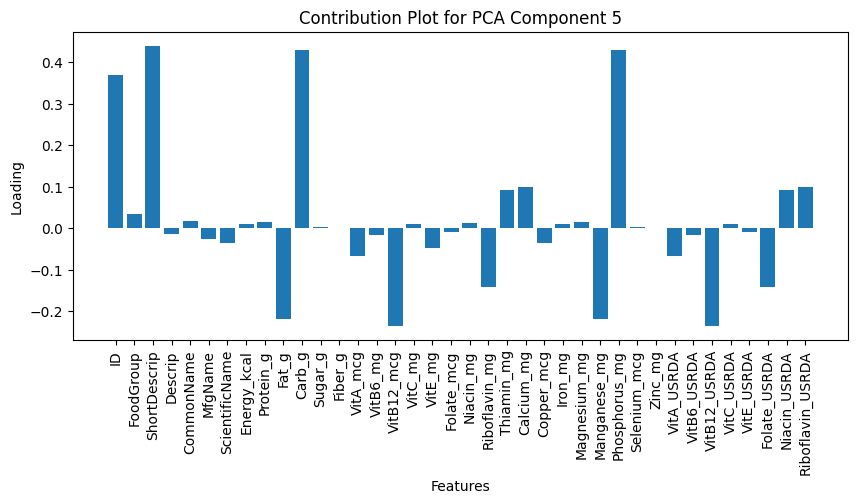

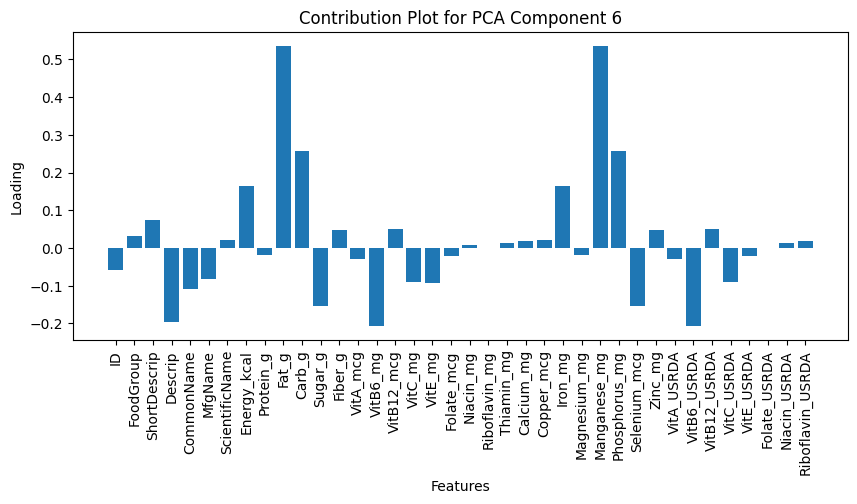

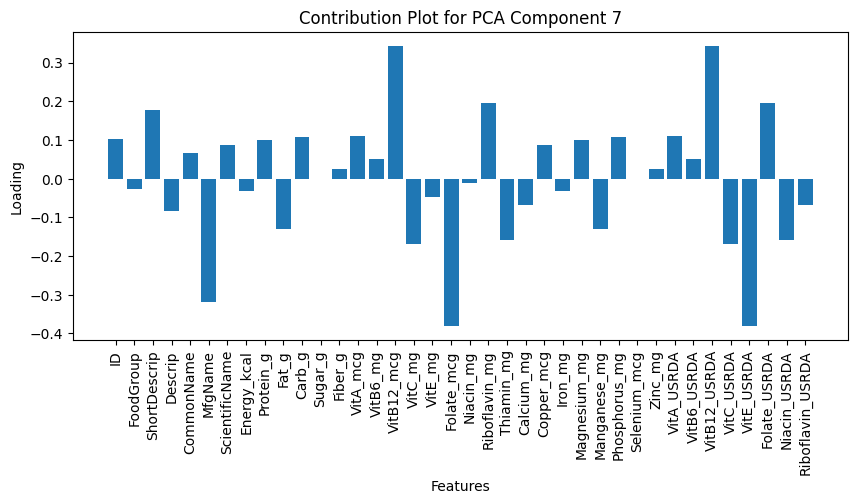

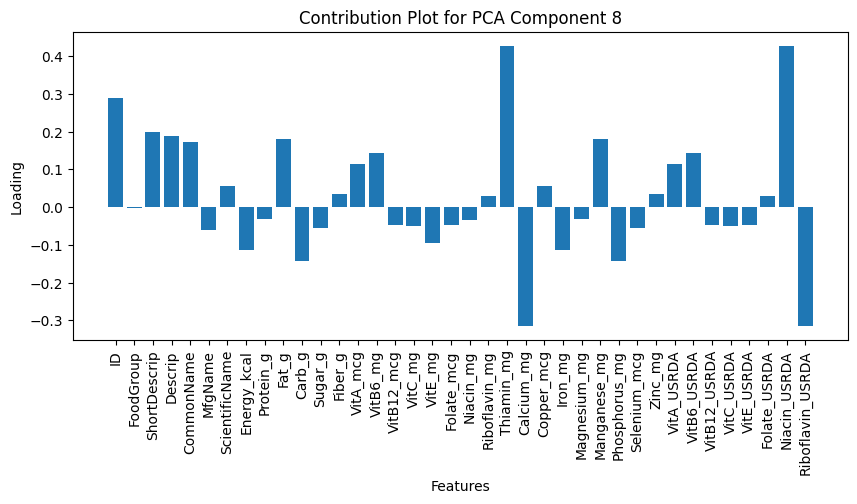

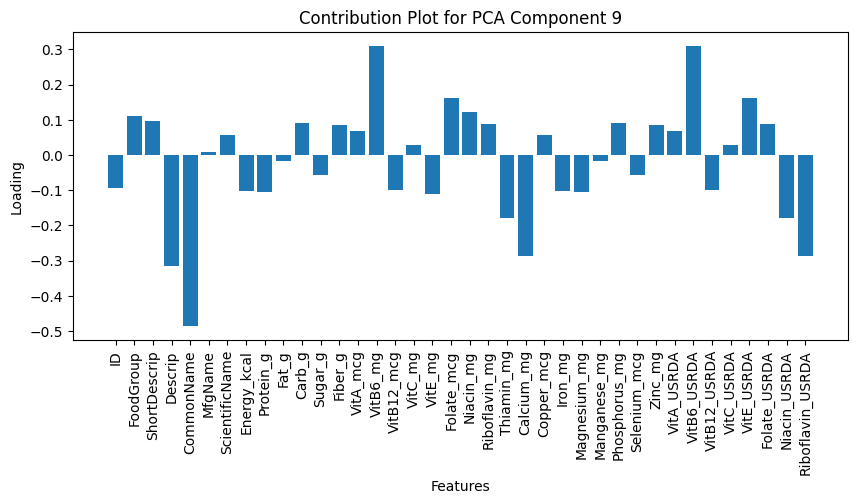

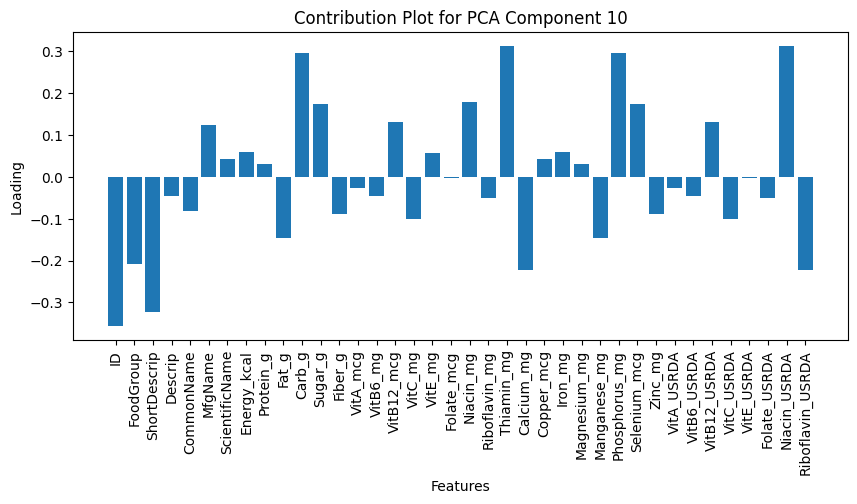

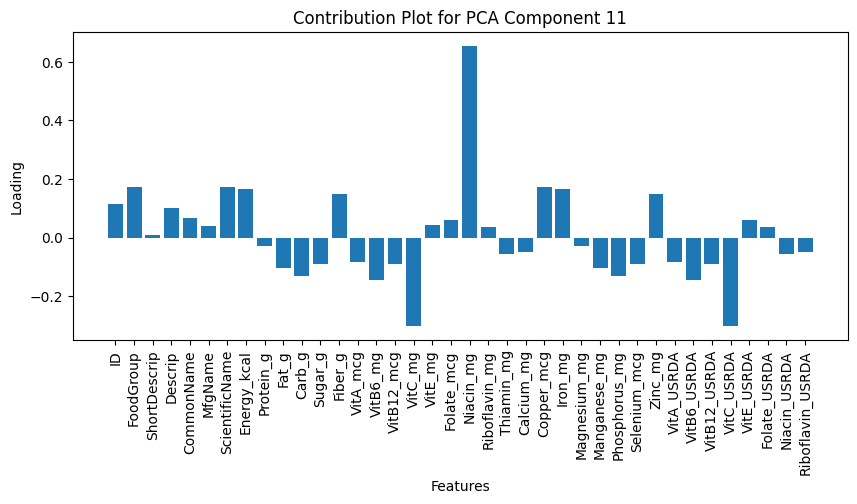

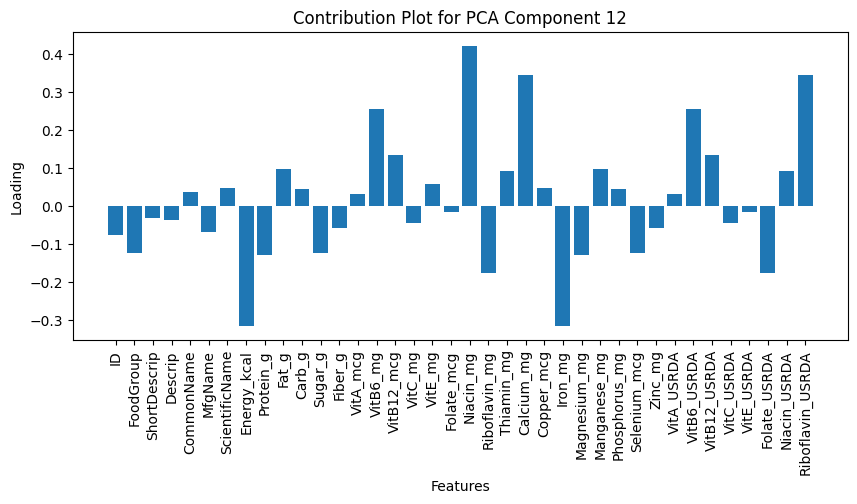

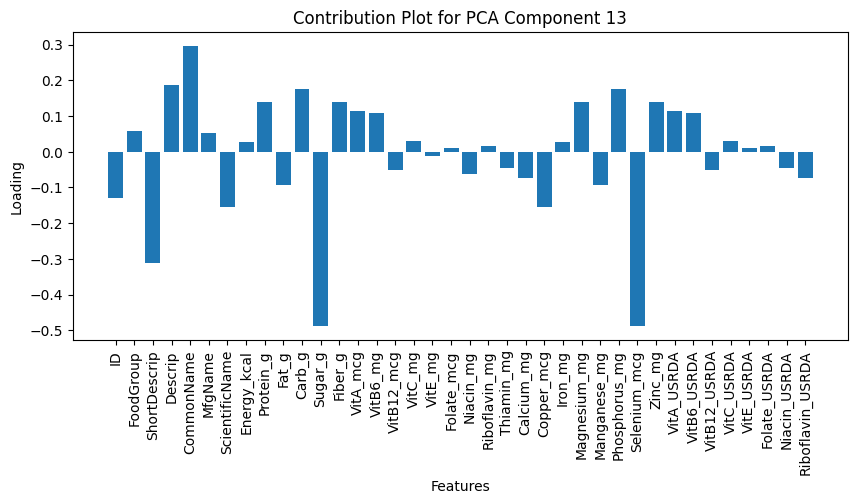

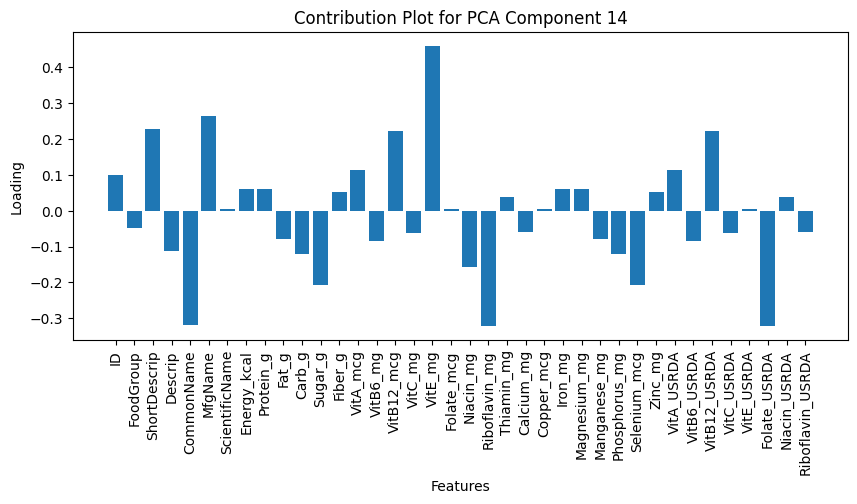

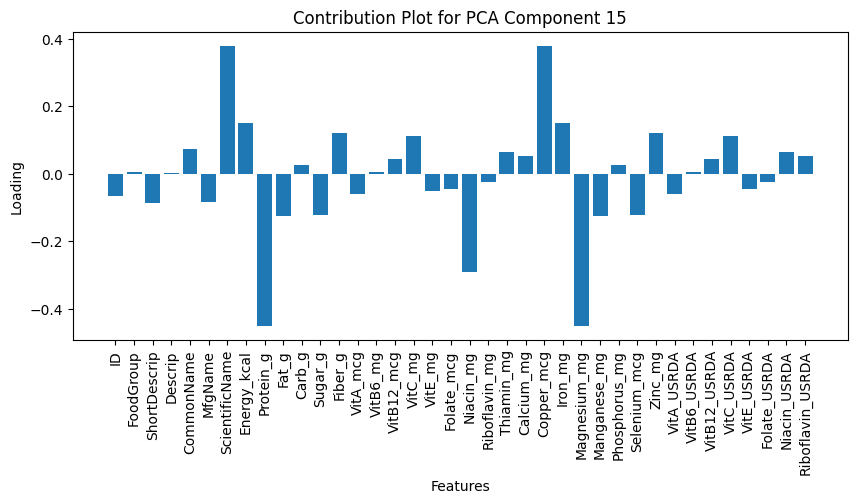

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'pca' is your trained PCA model
components = pca.components_

# Number of features should match the number of PCA loadings
num_features = components.shape[1]

# Ensure that the features DataFrame has the correct number of columns
# If 'features' is the original DataFrame, then we should use its columns directly
feature_names = data.columns[:num_features]

for i, component in enumerate(components):
    plt.figure(figsize=(10, 4))
    plt.bar(feature_names, component)
    plt.xlabel('Features')
    plt.ylabel('Loading')
    plt.title(f'Contribution Plot for PCA Component {i+1}')
    plt.xticks(rotation=90)
    plt.show()


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'data' is your DataFrame and it has a 'FoodGroup' column
groups = data['FoodGroup'].unique()
important_features_per_component_per_group = {}

for group in groups:
    # Filter data for the current group
    group_data = data[data['FoodGroup'] == group]

    # Selecting numerical features
    numerical_data = group_data.select_dtypes(include=[np.number])

    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numerical_data)

    # Perform PCA with 25 components
    pca = PCA(n_components=15)
    pca.fit(scaled_data)

    # Analyze the loadings for each component
    components_features = {}
    for i, component in enumerate(pca.components_):
        # Sort the features by their loadings in the current component
        sorted_features = sorted(zip(numerical_data.columns, component), key=lambda x: x[1], reverse=True)
        components_features[f'Component {i+1}'] = [feature for feature, loading in sorted_features]

    # Store important features for each component in the group
    important_features_per_component_per_group[group] = components_features

# Display important features for each component in each group
for group, components in important_features_per_component_per_group.items():
    print(f"Important features for {group}:")
    for component, features in components.items():
        print(f"{component}:")
        print(features[:5])  # Display top 5 features for brevity
    print("\n")



Important features for Dairy and Egg Products:
Component 1:
['VitB6_USRDA', 'VitB6_mg', 'Thiamin_USRDA', 'Thiamin_mg', 'Folate_mcg']
Component 2:
['VitC_USRDA', 'VitC_mg', 'Niacin_USRDA', 'Niacin_mg', 'VitE_USRDA']
Component 3:
['Selenium_USRDA', 'Selenium_mcg', 'Riboflavin_mg', 'Riboflavin_USRDA', 'Iron_mg']
Component 4:
['Carb_g', 'Sugar_g', 'Riboflavin_mg', 'Riboflavin_USRDA', 'Magnesium_mg']
Component 5:
['Manganese_mg', 'Energy_kcal', 'Carb_g', 'Sugar_g', 'Fat_g']
Component 6:
['VitB12_USRDA', 'VitB12_mcg', 'Iron_mg', 'VitB6_mg', 'VitB6_USRDA']
Component 7:
['ID', 'Sugar_g', 'Iron_mg', 'Carb_g', 'Selenium_USRDA']
Component 8:
['Fiber_g', 'ID', 'Iron_mg', 'Protein_g', 'Copper_mcg']
Component 9:
['Manganese_mg', 'Copper_mcg', 'Copper_USRDA', 'Iron_mg', 'Protein_g']
Component 10:
['VitB12_mcg', 'VitB12_USRDA', 'ID', 'VitA_mcg', 'VitA_USRDA']
Component 11:
['Iron_mg', 'Magnesium_mg', 'Magnesium_USRDA', 'Fat_g', 'Energy_kcal']
Component 12:
['Riboflavin_mg', 'Riboflavin_USRDA', 'Iron_m

To provide a detailed analysis for each food group based on the PCA components and explain the conclusions, we'll examine the top features (nutrients) of the first few principal components for each group. The principal components represent combinations of original features (nutrients) that capture the most variance or diversity within each food group. The presence of specific nutrients in the top positions of these components indicates their relative importance or prevalence in that food group.

### 1. Dairy and Egg Products:
   - **Key Nutrients:** B-vitamins (VitB6, Thiamin, Folate) are prominent in early components.
   - **Insights:** Dairy products are often rich in B-vitamins, crucial for energy metabolism and nervous system function.
   - **Conclusion:** The emphasis on these vitamins highlights their nutritional significance in dairy products.

### 2. Spices and Herbs:
   - **Key Nutrients:** Magnesium, Zinc, and a variety of vitamins (VitA, VitE, VitB6).
   - **Insights:** Spices and herbs are known for their concentrated nutrients, especially minerals and vitamins.
   - **Conclusion:** The variety of vitamins and minerals underscores the nutritional richness of spices and herbs.

### 3. Baby Foods:
   - **Key Nutrients:** A mix of energy (kcal), Copper, B-vitamins, and Vitamin A.
   - **Insights:** Baby foods are formulated to be nutrient-dense, supporting growth and development.
   - **Conclusion:** The diverse nutrient profile reflects the comprehensive nutrition necessary for infants.

### 4. Fats and Oils:
   - **Key Nutrients:** Zinc, Vitamin B12, B6, and various fatty acids.
   - **Insights:** Fats and oils contribute essential fatty acids and are often fortified with vitamins.
   - **Conclusion:** Their nutrient composition supports various bodily functions, including hormonal balance and cell structure.

### 5. Poultry Products:
   - **Key Nutrients:** Vitamin B12, Folate, Iron.
   - **Insights:** Poultry is a good source of lean protein and several essential nutrients.
   - **Conclusion:** The nutrient composition makes poultry a valuable part of a balanced diet.

### 6. Soups, Sauces, and Gravies:
   - **Key Nutrients:** Phosphorus, Riboflavin, Vitamin A and C.
   - **Insights:** These products often contain a variety of ingredients, including vegetables, which contribute to their nutrient profile.
   - **Conclusion:** They can be a source of essential vitamins and minerals in the diet.

### 7. Sausages and Luncheon Meats:
   - **Key Nutrients:** Riboflavin, VitB12, Copper, Iron.
   - **Insights:** Processed meats can be rich in certain vitamins and minerals but also high in fat and sodium.
   - **Conclusion:** They provide certain nutrients but should be consumed in moderation.

### 8. Breakfast Cereals:
   - **Key Nutrients:** B-vitamins, Magnesium, Phosphorus.
   - **Insights:** Many cereals are fortified with vitamins and minerals.
   - **Conclusion:** They can be a significant source of nutrients, especially in fortified varieties.

### 9. Snacks:
   - **Key Nutrients:** Niacin, Manganese, Fat, and Energy.
   - **Insights:** Snack foods vary widely but often are calorie-dense.
   - **Conclusion:** They can provide certain nutrients but also contribute to increased calorie intake.

### 10. Vegetables and Vegetable Products:
   - **Key Nutrients:** Zinc, Magnesium, Iron, and Calcium.
   - **Insights:** Vegetables are key sources of minerals and vitamins, essential for various bodily functions.
   - **Conclusion:** Their nutrient profile supports their role as essential components of a healthy diet.

### 11. Nut and Seed Products:
   - **Key Nutrients:** Phosphorus, Vitamin A, E, and various minerals.
   - **Insights:** Nuts and seeds are nutrient-dense, providing essential fats, vitamins, and minerals.
   - **Conclusion:** They are excellent for adding nutrient density to the diet, especially for minerals and vitamins.

### 12. Beef Products:
   - **Key Nutrients:** VitB12, Zinc, Iron.
   - **Insights:** Beef is a significant source of protein and essential nutrients like VitB12 and Iron.
   - **Conclusion:** It's valuable for its high nutrient content, particularly for iron and B12.

### 13. Beverages:
   - **Key Nutrients:** Magnesium, VitC, B-vitamins.
   - **Insights:** Beverages, especially fortified ones, can be a source of various vitamins and minerals.
   - **Conclusion:** They can contribute to daily vitamin and mineral intake but vary widely in nutrient content.

### 14. Finfish and Shellfish Products:


   - **Key Nutrients:** Iron, VitC, VitB12.
   - **Insights:** Seafood is known for its omega-3 fatty acids, vitamins, and minerals.
   - **Conclusion:** It’s beneficial for heart health and essential nutrients like VitB12 and Iron.

### 15. Legumes and Legume Products:
   - **Key Nutrients:** Zinc, VitB12, VitA, and E.
   - **Insights:** Legumes are a great plant-based protein source and rich in various nutrients.
   - **Conclusion:** They are important for providing essential nutrients, especially in plant-based diets.

### 16. Lamb, Veal, and Game Products:
   - **Key Nutrients:** Riboflavin, VitB12, Selenium.
   - **Insights:** These meats are good protein sources and contain specific nutrients like B12 and Riboflavin.
   - **Conclusion:** They offer a diverse range of nutrients, important for a balanced diet.

### 17. Baked Products:
   - **Key Nutrients:** Zinc, VitA, B-vitamins.
   - **Insights:** Baked goods can be fortified with vitamins and minerals, but their nutrient content varies.
   - **Conclusion:** They can contribute to nutrient intake but are often calorie-dense.

### 18. Sweets:
   - **Key Nutrients:** Magnesium, Zinc, Copper.
   - **Insights:** Sweets can have added vitamins and minerals but are generally high in sugars.
   - **Conclusion:** Their consumption should be limited, despite the presence of certain nutrients.

### 19. Cereal Grains and Pasta:
   - **Key Nutrients:** Phosphorus, Folate, B-vitamins.
   - **Insights:** Grains and pasta, especially whole grains, are good sources of energy and nutrients.
   - **Conclusion:** They are staple foods that contribute significantly to nutrient intake, particularly B-vitamins.

### 20. Fast Foods:
   - **Key Nutrients:** Selenium, VitB6, Niacin.
   - **Insights:** While fast foods can provide some nutrients, they are often high in calories and unhealthy fats.
   - **Conclusion:** Occasional consumption is okay, but reliance on fast food can lead to nutrient imbalances.

### 21. Meals, Entrees, and Side Dishes:
   - **Key Nutrients:** Selenium, VitC, Carbohydrates.
   - **Insights:** These foods vary widely in nutrient content based on ingredients.
   - **Conclusion:** They can be part of a balanced diet but should be chosen carefully for nutrient quality.

### 22. American Indian/Alaska Native Foods:
   - **Key Nutrients:** Zinc, VitB6, Phosphorus.
   - **Insights:** Traditional foods in this category often include game and plant foods, rich in specific nutrients.
   - **Conclusion:** They provide important nutritional diversity and cultural significance.

### 23. Restaurant Foods:
   - **Key Nutrients:** Protein, Phosphorus, Manganese.
   - **Insights:** Restaurant meals can be nutritious but also high in calories and sodium.
   - **Conclusion:** Nutrient content can vary greatly; mindful choices are important for maintaining a balanced diet.

### General Conclusion:
Each food group has its unique set of nutrients that are prevalent and important. Understanding these can help in making informed dietary choices, ensuring a well-rounded and nutrient-rich diet. The PCA analysis helps in identifying these key nutrients, contributing to dietary planning and nutritional education.

In [ ]:
pca_data.shape

(8618, 30)

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

# Assuming y_test and y_pred_orig contain the true and predicted labels for the original dataset
# And y_pred_pca for the PCA-reduced dataset

# Generate classification reports
report_orig = classification_report(y_test, y_pred_orig, output_dict=True)
report_pca = classification_report(y_test, y_pred_pca, output_dict=True)

# Convert to DataFrame for better formatting
df_report_orig = pd.DataFrame(report_orig).transpose()
df_report_pca = pd.DataFrame(report_pca).transpose()

# Show the formatted classification reports
df_report_orig



precision    recall  f1-score  \
American Indian/Alaska Native Foods   0.882353  0.769231  0.821918   
Baby Foods                            0.958333  0.950413  0.954357   
Baked Products                        0.951020  0.991489  0.970833   
Beef Products                         0.985130  0.985130  0.985130   
Beverages                             0.950000  0.959596  0.954774   
Breakfast Cereals                     0.970297  0.989899  0.980000   
Cereal Grains and Pasta               0.964286  0.870968  0.915254   
Dairy and Egg Products                0.988372  0.977011  0.982659   
Fast Foods                            0.954128  0.945455  0.949772   
Fats and Oils                         0.984615  0.914286  0.948148   
Finfish and Shellfish Products        1.000000  0.978022  0.988889   
Fruits and Fruit Juices               1.000000  0.990000  0.994975   
Lamb, Veal, and Game Products         0.955224  0.992248  0.973384   
Legumes and Legume Products           0.950000  0.991304  0.970213   
Meals, Entrees, and Side Dishes       0.965517  0.903226  0.933333   
Nut and Seed Products                 0.911765  0.939394  0.925373   
Pork Products                         0.977528  1.000000  0.988636   
Poultry Products                      0.991150  1.000000  0.995556   
Restaurant Foods                      0.941176  0.914286  0.927536   
Sausages and Luncheon Meats           1.000000  0.937500  0.967742   
Snacks                                0.901961  0.867925  0.884615   
Soups, Sauces, and Gravies            0.948052  0.960526  0.954248   
Spices and Herbs                      1.000000  0.777778  0.875000   
Sweets                                0.878505  0.930693  0.903846   
Vegetables and Vegetable Products     0.992278  0.996124  0.994197   
accuracy                              0.964811  0.964811  0.964811   
macro avg                             0.960068  0.941300  0.949616   
weighted avg                          0.965102  0.964811  0.964528   

                                         support  
American Indian/Alaska Native Foods    39.000000  
Baby Foods                            121.000000  
Baked Products                        235.000000  
Beef Products                         269.000000  
Beverages                              99.000000  
Breakfast Cereals                      99.000000  
Cereal Grains and Pasta                62.000000  
Dairy and Egg Products                 87.000000  
Fast Foods                            110.000000  
Fats and Oils                          70.000000  
Finfish and Shellfish Products         91.000000  
Fruits and Fruit Juices               100.000000  
Lamb, Veal, and Game Products         129.000000  
Legumes and Legume Products           115.000000  
Meals, Entrees, and Side Dishes        31.000000  
Nut and Seed Products                  33.000000  
Pork Products                          87.000000  
Poultry Products                      112.000000  
Restaurant Foods                       35.000000  
Sausages and Luncheon Meats            80.000000  
Snacks                                 53.000000  
Soups, Sauces, and Gravies            152.000000  
Spices and Herbs                       18.000000  
Sweets                                101.000000  
Vegetables and Vegetable Products     258.000000  
accuracy                                0.964811  
macro avg                            2586.000000  
weighted avg                         2586.000000

In [ ]:
df_report_pca

precision    recall  f1-score  \
American Indian/Alaska Native Foods   0.727273  0.820513  0.771084   
Baby Foods                            0.862595  0.933884  0.896825   
Baked Products                        0.869732  0.965957  0.915323   
Beef Products                         0.970260  0.970260  0.970260   
Beverages                             0.975000  0.787879  0.871508   
Breakfast Cereals                     0.763158  0.878788  0.816901   
Cereal Grains and Pasta               0.883333  0.854839  0.868852   
Dairy and Egg Products                0.926829  0.873563  0.899408   
Fast Foods                            0.950980  0.881818  0.915094   
Fats and Oils                         0.982143  0.785714  0.873016   
Finfish and Shellfish Products        0.965909  0.934066  0.949721   
Fruits and Fruit Juices               0.895238  0.940000  0.917073   
Lamb, Veal, and Game Products         0.931298  0.945736  0.938462   
Legumes and Legume Products           0.864865  0.834783  0.849558   
Meals, Entrees, and Side Dishes       0.884615  0.741935  0.807018   
Nut and Seed Products                 0.733333  0.666667  0.698413   
Pork Products                         0.903226  0.965517  0.933333   
Poultry Products                      0.939655  0.973214  0.956140   
Restaurant Foods                      0.777778  1.000000  0.875000   
Sausages and Luncheon Meats           0.884058  0.762500  0.818792   
Snacks                                0.894737  0.641509  0.747253   
Soups, Sauces, and Gravies            0.980000  0.967105  0.973510   
Spices and Herbs                      0.800000  0.666667  0.727273   
Sweets                                0.790909  0.861386  0.824645   
Vegetables and Vegetable Products     0.919231  0.926357  0.922780   
accuracy                              0.900619  0.900619  0.900619   
macro avg                             0.883046  0.863226  0.869490   
weighted avg                          0.903788  0.900619  0.899899   

                                         support  
American Indian/Alaska Native Foods    39.000000  
Baby Foods                            121.000000  
Baked Products                        235.000000  
Beef Products                         269.000000  
Beverages                              99.000000  
Breakfast Cereals                      99.000000  
Cereal Grains and Pasta                62.000000  
Dairy and Egg Products                 87.000000  
Fast Foods                            110.000000  
Fats and Oils                          70.000000  
Finfish and Shellfish Products         91.000000  
Fruits and Fruit Juices               100.000000  
Lamb, Veal, and Game Products         129.000000  
Legumes and Legume Products           115.000000  
Meals, Entrees, and Side Dishes        31.000000  
Nut and Seed Products                  33.000000  
Pork Products                          87.000000  
Poultry Products                      112.000000  
Restaurant Foods                       35.000000  
Sausages and Luncheon Meats            80.000000  
Snacks                                 53.000000  
Soups, Sauces, and Gravies            152.000000  
Spices and Herbs                       18.000000  
Sweets                                101.000000  
Vegetables and Vegetable Products     258.000000  
accuracy                                0.900619  
macro avg                            2586.000000  
weighted avg                         2586.000000

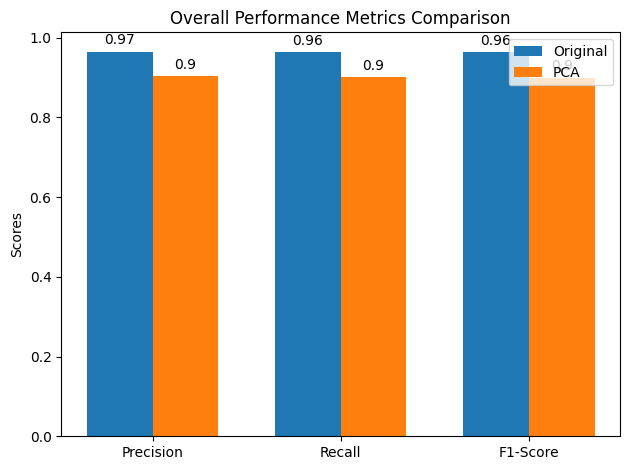

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_report_orig and df_report_pca are already defined DataFrames of classification reports

# First, we'll take the 'macro avg' or 'weighted avg' (depending on what you want to report) for comparison:
metrics_orig = df_report_orig.loc['weighted avg', ['precision', 'recall', 'f1-score']]
metrics_pca = df_report_pca.loc['weighted avg', ['precision', 'recall', 'f1-score']]

# Now let's create a bar plot for comparison
labels = ['Precision', 'Recall', 'F1-Score']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, metrics_orig, width, label='Original')
rects2 = ax.bar(x + width/2, metrics_pca, width, label='PCA')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Overall Performance Metrics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to attach a text label above each bar, displaying its height.
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the autolabel function for each set of bars.
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()
